In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load complete alarmlog from turbines at Bessaker
alarms = pd.read_excel('DataFromBazefield/AlarmlogBessaker.xlsx')

In [3]:
# drop certain alarms:
# alarms = alarms[alarms.Alarm != 'Status_2_Substatus_1']

In [4]:
# sort alrams based on turbine and store in a dictionary 
individual_turbine_alarm = {}

for i in range(25):
    if(i+1 < 10):
        individual_turbine_alarm[i+1] = alarms.loc[alarms['Turbine'] == 'BESS-WTG0{0}'.format(i+1)]
    else :
        individual_turbine_alarm[i+1] = alarms.loc[alarms['Turbine'] == 'BESS-WTG{0}'.format(i+1)]
    
    individual_turbine_alarm[i+1] = individual_turbine_alarm[i+1].reset_index(drop=True)

In [199]:
individual_turbine_alarm[25]

Site     Turbine                     Alarm       Code Event Type  \
0    Bessaker  BESS-WTG25      Status_8_Substatus_0   0.333333          A   
1    Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
2    Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
3    Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
4    Bessaker  BESS-WTG25    Status_240_Substatus_0      240:0          A   
5    Bessaker  BESS-WTG25    Status_240_Substatus_1      240:1          A   
6    Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
7    Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
8    Bessaker  BESS-WTG25    Status_240_Substatus_0      240:0          A   
9    Bessaker  BESS-WTG25    Status_240_Substatus_1      240:1          A   
10   Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
11   Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
12   Bessaker  BESS-WTG25    Status_240_Substatus_0      240:0          A   
13   Bessaker  BESS-WTG25    Status_240_Substatus_1      240:1          A   
14   Bessaker  BESS-WTG25    Status_240_Substatus_0      240:0          A   
15   Bessaker  BESS-WTG25    Status_240_Substatus_1      240:1          A   
16   Bessaker  BESS-WTG25      Status_8_Substatus_0   0.333333          A   
17   Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
18   Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
19   Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
20   Bessaker  BESS-WTG25     Status_21_Substatus_2   0.876389          A   
21   Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
22   Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
23   Bessaker  BESS-WTG25      Status_8_Substatus_0   0.333333          A   
24   Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
25   Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
26   Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
27   Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
28   Bessaker  BESS-WTG25      Status_8_Substatus_0   0.333333          A   
29   Bessaker  BESS-WTG25      Status_8_Substatus_0   0.333333          A   
..        ...         ...                       ...        ...        ...   
924  Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
925  Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
926  Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
927  Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
928  Bessaker  BESS-WTG25      Status_2_Substatus_2  0.0847222          A   
929  Bessaker  BESS-WTG25      Status_9_Substatus_1   0.375694          A   
930  Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
931  Bessaker  BESS-WTG25      Status_8_Substatus_0   0.333333          A   
932  Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
933  Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
934  Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
935  Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
936  Bessaker  BESS-WTG25      Status_8_Substatus_0   0.333333          A   
937  Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
938  Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
939  Bessaker  BESS-WTG25      Status_8_Substatus_0   0.333333          A   
940  Bessaker  BESS-WTG25      Status_8_Substatus_0   0.333333          A   
941  Bessaker  BESS-WTG25      Status_1_Substatus_1  0.0423611          A   
942  Bessaker  BESS-WTG25      Status_2_Substatus_1  0.0840278          A   
943  Bessaker  BESS-WTG25  Status_240_Substatus_246    240:246          A   
944  

In [241]:
# Parsing time:
def get_time_duration(alarm_1, alarm_2):
    end_of_alarm_1 = alarm_1.End
    start_of_alarm_2 = alarm_2.Start
    duration = start_of_alarm_2 - end_of_alarm_1
    duration_mins = duration/np.timedelta64(1, 'm')
    duration_hrs = duration/np.timedelta64(1, 'h')
    duration_days = duration/np.timedelta64(1, 'D')

    #print('Difference between start and end in minutes: {0}'.format(duration_mins))
    #print('Difference between start and end in hours: {0}'.format(duration_hrs))
    #print('Difference between start and end in days: {0}'.format(duration_days))
    return duration_hrs

get_time_duration(individual_turbine_alarm[1].iloc[1], individual_turbine_alarm[1].iloc[0])

98.49722222222222

In [562]:
#REMEBER: the dataset has the latest alarms on top

def groupConsecutiveErrors(turbine_data, hour_limit):
    all_consecutive_errors        = []
    all_consecutive_alarms        = []
    all_consecutive_codes         = []
    all_consecutive_descriptions  = [] 

    test_sample = turbine_data
    current_alarm_count = test_sample.shape[0]-1

    for i in reversed(range(test_sample.shape[0])):
    #for i in reversed(range(individual_alarm[1].shape[0])):

        build_array = True

        if(current_alarm_count >= i):

            new_alarm_count = i-1
            root_alarm = test_sample.iloc[current_alarm_count]

            # Create a list with following alarms
            whole_consecutive_alarms = []
            whole_consecutive_alarms.append(root_alarm)

            consecutive_alarms = []
            consecutive_alarms.append(root_alarm.Alarm)
            
            alarm_codes = []
            alarm_codes.append(root_alarm.Code)
            
            alarm_descriptions = []
            alarm_descriptions.append(root_alarm.Code)

            while(build_array == True and new_alarm_count >= 0):
                current_alarm = test_sample.iloc[i]
                new_alarm = test_sample.iloc[new_alarm_count]
                duration_hrs = get_time_duration(current_alarm, new_alarm)

                if(duration_hrs < hour_limit):
                    whole_consecutive_alarms.append(new_alarm)
                    consecutive_alarms.append(new_alarm.Alarm)
                    alarm_codes.append(new_alarm.Code)
                    alarm_descriptions.append(new_alarm.Description)
                    
                    current_alarm_count = current_alarm_count - 1
                    new_alarm_count = new_alarm_count - 1
                else:
                    build_array = False
                    if(len(consecutive_alarms) > 1):
                        all_consecutive_errors.append(whole_consecutive_alarms)
                        all_consecutive_alarms.append(consecutive_alarms)
                        all_consecutive_codes.append(alarm_codes)
                        all_consecutive_descriptions.append(alarm_descriptions)
                        
    return all_consecutive_errors, all_consecutive_alarms, all_consecutive_codes, all_consecutive_descriptions


def printLog(error_list):      
    # Print the consecutive alarms
    print(len(error_list))
    for i in range(len(error_list)):
        print('\nList {0} begins {1} and contains the following alarms: '
              .format(i, error_list[i][0].Start))
        for j in range(len(error_list[i])):
            print('Alarm: {} \tStarted: {} \tEnded{}'.format(error_list[i][j].Alarm, 
                                                           error_list[i][j].Start, 
                                                           error_list[i][j].End))

def simplePrintLog(error_list):
    # Print the consecutive alarms
    print(len(error_list))
    for i in range(len(error_list)):
        print('\nList {0} contains the following alarms: '.format(i))
        for j in range(len(error_list[i])):
            print('Alarm: {}'.format(error_list[i][j]))

In [639]:
whole_alarm_list, only_alarms, only_codes, only_descriptions = groupConsecutiveErrors(individual_turbine_alarm[25], 1)


In [640]:
#printLog(whole_alarm_list)
simplePrintLog(only_descriptions)

414

List 0 contains the following alarms: 
Alarm: 0.876388888888889
Alarm: N   2:1 Lack of wind - (Wind speed too low)

List 1 contains the following alarms: 
Alarm: 0.0840277777777778
Alarm: R  300:81 Turbine control bus error - (I/O-board control cabinet)
Alarm: R  304:17 Data bus error (Timeout) - (Blade A)

List 2 contains the following alarms: 
Alarm: 304:17
Alarm: R  304:17 Data bus error (Timeout) - (Blade A)

List 3 contains the following alarms: 
Alarm: 300:81
Alarm: N  8:0 Maintenance - (Maintenance)

List 4 contains the following alarms: 
Alarm: 304:17
Alarm: N   9:8 Generator heating - (Manual)
Alarm: N  8:0 Maintenance - (Maintenance)

List 5 contains the following alarms: 
Alarm: 0.380555555555556
Alarm: N  8:0 Maintenance - (Maintenance)
Alarm: N   9:8 Generator heating - (Manual)

List 6 contains the following alarms: 
Alarm: 0.380555555555556
Alarm: N   2:1 Lack of wind - (Wind speed too low)

List 7 contains the following alarms: 
Alarm: 240:246
Alarm: N  8:0 Mainten

In [641]:
def countSameLog(simle_alarm_log):
    repeated_log = {}
    for i in range(len(simle_alarm_log)):
        name = ''
        for alarm in simle_alarm_log[i]:
            name = '{0}{1} '.format(name, alarm)
        
        number_of_repetition = simle_alarm_log.count(simle_alarm_log[i])
        if(number_of_repetition > 1):
            repeated_log[name] = number_of_repetition
            
    sorted_repeated_log = sorted(repeated_log.items(), key=lambda kv: kv[1], reverse=True)

    print('Occurrence\tAlarms')
    for j in range(len(sorted_repeated_log)):
        print('{}\t{}'.format(sorted_repeated_log[j][1], sorted_repeated_log[j][0]))
    return(sorted_repeated_log)

def visualizeCount(sorted_alarm_log):
    labels = []
    occurrance = []
    for i in range(len(sorted_alarm_log)):
        occurrance.append(sorted_alarm_log[i][1])
        labels.append(sorted_alarm_log[i][0])

    x = np.arange(len(labels))
    y = np.arange(0, max(occurrance)+2, 2)
    fig, ax = plt.subplots(1,1,figsize=(20,20))
    rects1 = ax.barh(x, occurrance)
    ax.set_xlabel('Occurances')
    ax.set_title('Occurrances of Fault Series')
    ax.set_yticks(x)
    ax.set_xticks(y)
    ax.set_yticklabels(labels)
    #ax.legend()
    print(max(occurrance))
    plt.show()
    

In [642]:
ls = [3435,454235, 24524,34]
print(max(ls))

454235


In [643]:
repeated_alarm_log = countSameLog(only_alarms)
repeated_code_log = countSameLog(only_codes)
repeated_description_log = countSameLog(only_descriptions)

Occurrence	Alarms
116	Status_2_Substatus_1 Status_2_Substatus_1 
14	Status_2_Substatus_1 Status_9_Substatus_8 
13	Status_8_Substatus_0 Status_2_Substatus_1 
10	Status_9_Substatus_8 Status_2_Substatus_1 
10	Status_2_Substatus_1 Status_8_Substatus_0 
6	Status_21_Substatus_2 Status_2_Substatus_1 
6	Status_2_Substatus_1 Status_2_Substatus_1 Status_9_Substatus_8 
6	Status_2_Substatus_1 Status_2_Substatus_1 Status_2_Substatus_1 
5	Status_2_Substatus_2 Status_2_Substatus_1 
5	Status_2_Substatus_1 Status_21_Substatus_2 Status_2_Substatus_1 
4	Status_2_Substatus_1 Status_240_Substatus_0 
4	Status_8_Substatus_0 Status_9_Substatus_8 
4	Status_2_Substatus_1 Status_9_Substatus_3 
3	Status_2_Substatus_1 Status_222_Substatus_1 Status_220_Substatus_33 
3	Status_2_Substatus_1 Status_60_Substatus_15 
3	Status_2_Substatus_1 Status_8_Substatus_0 Status_8_Substatus_0 
3	Status_2_Substatus_1 Status_222_Substatus_3 
3	Status_2_Substatus_1 Status_80_Substatus_1 
3	Status_2_Substatus_1 Status_8_Substatus_0 Sta

116


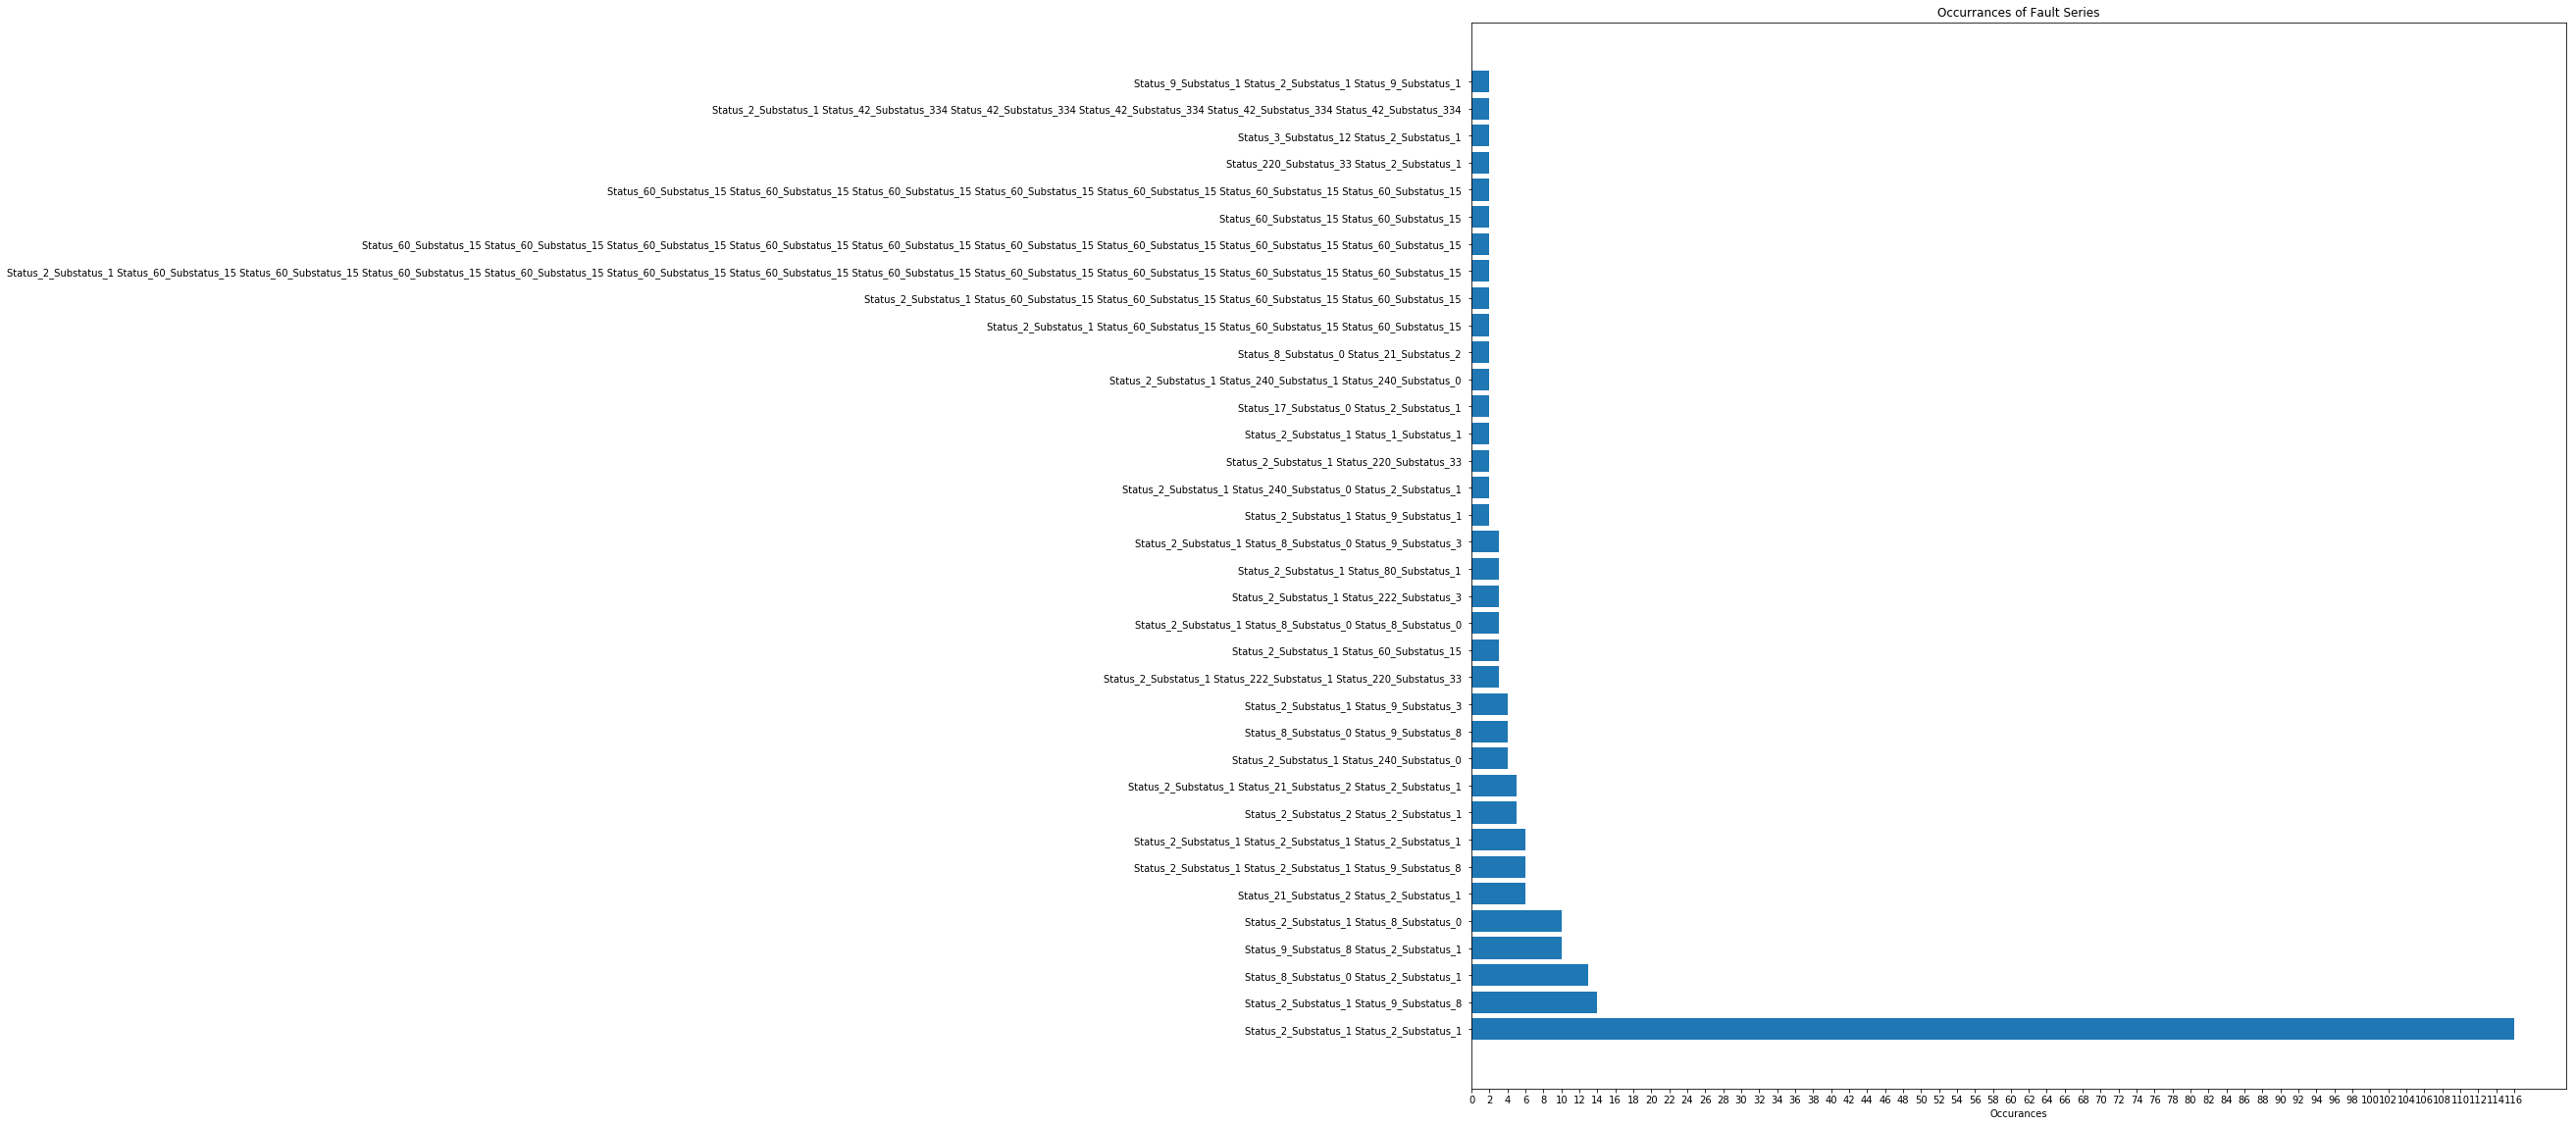

In [644]:
visualizeCount(repeated_alarm_log)

116


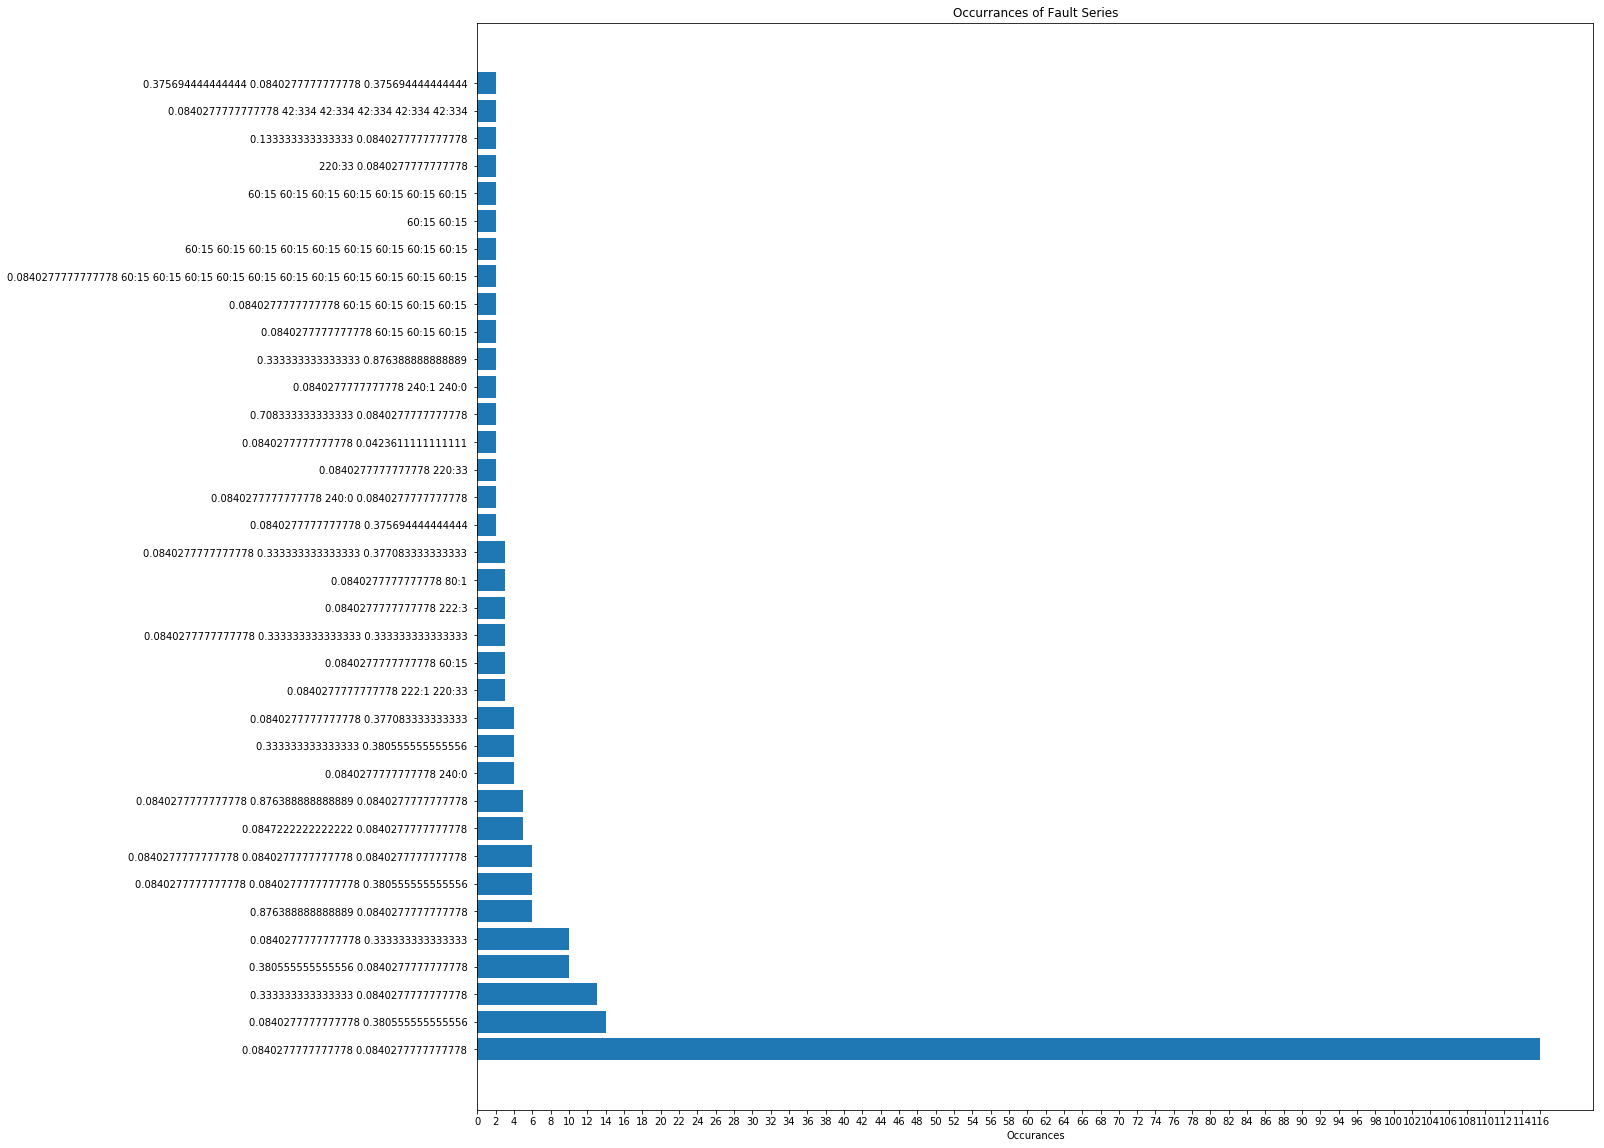

In [645]:
visualizeCount(repeated_code_log)

116


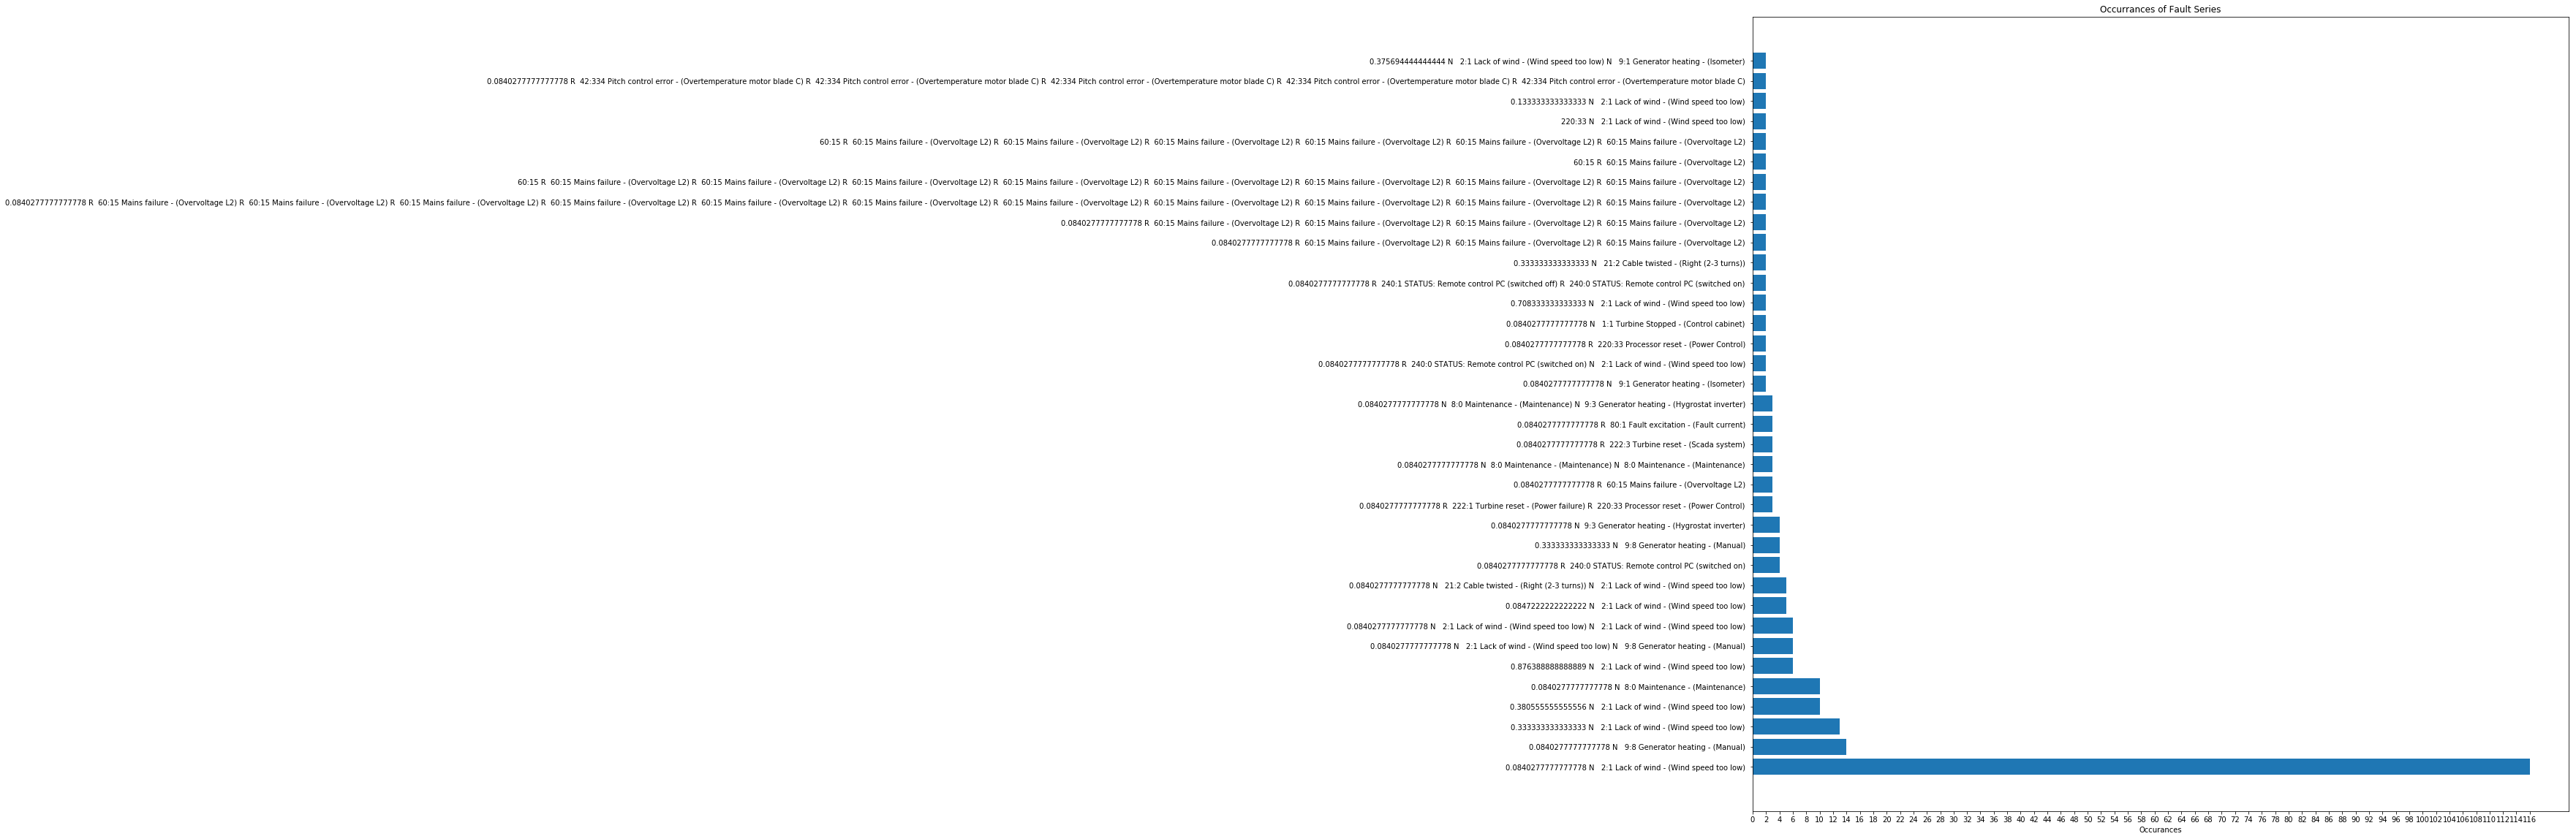

In [646]:
visualizeCount(repeated_description_log)